# Analysis on Flight Delay and Cancellation 

GROUP 01: Pranjal Shukla, Eric Tien, Sai Chaithanya Vadakattu, Jinni Yang, Frank Yao


Group Lead: Frank yao

## Ask 1: Search for a dataset

### Identify and describe your dataset

For the project, our group would like to look into the Flight delays and cancellations in the United States . More specifically, the dataset presents flight data from all the domestic airlines in the year 2015. Some of the data includes flight performance(time delays or aheads), flight origins and destinations, flight identifications. 

You can download the dataset by unzipping the folder which can be downloded here:
(https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv). 

The dataset’s size is 592.41 MB and is last updated on 2015. The dataset contains data from over 5800k domestic flight trips completed. 

### Identify datasetsource

The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics. The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations. 

### Why is important and what appeals to you about it


While we are in the middle of the holiday season, finding a flight or airline that won’t do you bad can be tricky. What airlines are prone to delays? What airlines have the best overall performance? What airport seems to be the busiest? We hope by analyzing the performance of airlines and flights, we can probably find some insights to help you save time and money. 

As we dive deeper into the reasons for causing the delays, we can also find some insights regarding the reasons and provide recommendations for the airport and area management to better manage delays. 

Another reason for choosing this dataset is because this dataset comes in quite a good shape. There are fewer missing values and we have quite a lot factors to choose from when it comes to data analysis. 


### Acquire data and perform initial exploration to make sure it is suitable for dimensional modeling and analytical analysis


Yes, this dataset has 40 columns of both numerical and categorical data representing informations regarding flight origins, destinations, time, and location. Those attributes includes airtime, distance, arrival time, cancellation reason, etc. I think with all that information, we can generate a lot of interesting questions for analysis. 

### Describe the analytical questions you want to answer with the data. Minimum of 3 major questions are required

Business Question 1:

In order to improve the operating efficiency at major airports, the FAA would like to develop a system of reward and punishment based on the performance of major airline carriers. What are some measurements that they could use? And based on the result from the busiest route in USA in 2015, which airline performs the best and which airline performs the worst? 

Business Question 2:

During what time period, does the air route from Washington D.C. to New York sees the most delays? What are the reason for delays? Advices that we can give to airlines to better improve their service. 

Business Question 3:

Is there a relationship between customer's attitude on social media with performance of airlines
? Should people rely on social media platforms to choose airlines or should the airline companies use social media to monitor their brands? 

### Describe any concerns with the data and changes you expect to overcome


While taking an initial look at the data, we found that there are a lot of missing data in the cancellation reason column, in order to make sure we still have a reasonably large dataset to analyze, we might have to delete this column. 

Some other areas that we might have to make efforts on are providing supporting information so that they can be understood by the public. The names of airlines and airports are often times written in its assigned spells or initials, which makes it difficult for us to report. 

Limitations in analyzing due to lack of data in the cancellation reasons provided. For example, a flight cancellation might be due to 2 or 3 reasons combined. 


## Ask 2: Data Wrangling and Dimensional Modeling

### Dataset of "flights"

In [1]:
!pwd

/home/ubuntu/notebooks


In [2]:
!xsv headers flights.csv

1   YEAR
2   MONTH
3   DAY
4   DAY_OF_WEEK
5   AIRLINE
6   FLIGHT_NUMBER
7   TAIL_NUMBER
8   ORIGIN_AIRPORT
9   DESTINATION_AIRPORT
10  SCHEDULED_DEPARTURE
11  DEPARTURE_TIME
12  DEPARTURE_DELAY
13  TAXI_OUT
14  WHEELS_OFF
15  SCHEDULED_TIME
16  ELAPSED_TIME
17  AIR_TIME
18  DISTANCE
19  WHEELS_ON
20  TAXI_IN
21  SCHEDULED_ARRIVAL
22  ARRIVAL_TIME
23  ARRIVAL_DELAY
24  DIVERTED
25  CANCELLED
26  CANCELLATION_REASON
27  AIR_SYSTEM_DELAY
28  SECURITY_DELAY
29  AIRLINE_DELAY
30  LATE_AIRCRAFT_DELAY
31  WEATHER_DELAY


There are 31 columns totally in the original dataset.

Here are the Data definition of “flights”:
    
WHEELS_OFF Time - The time point that the aircraft's wheels leave the ground. \
WHEELS_ON Time - The time point that the aircraft's wheels touch on the ground. \
TAXI_OUT Time - The time duration elapsed between departure from the origin airport gate and wheels off. \
TAXI_IN Time - The time duration elapsed between wheels-on and gate arrival at the destination airport. \
AIR_TIME - The time duration between wheels_off and wheels_on time. \
Data Relationship \
arrival_time = wheels_on + taxi_in \
arrival_delay = arrival_time - scheduled_arrival \
darture_time = wheels_off - taxi_outep \
departure_delay = departure_time - scheduled_departure \
elapsed_time =air_time + taxi_in + taxi_out \
air_time = wheels_on - wheels_off

Because some columns we will not used in the analysis, so we want to remove 14 columns from the dataset and keep 17 columns, we can just select the columns which we want to reverve and create a new dataset called 'flights2'.

1   YEAR \
2   MONTH \
3   DAY \
4   DAY_OF_WEEK \
5   AIRLINE \
6   FLIGHT_NUMBER \
7   TAIL_NUMBER \
8   ORIGIN_AIRPORT \
9   DESTINATION_AIRPORT \
10  SCHEDULED_DEPARTURE \
11  DEPARTURE_TIME \
12  DEPARTURE_DELAY \
21  SCHEDULED_ARRIVAL \
22  ARRIVAL_TIME \
23  ARRIVAL_DELAY \
24  DIVERTED \
25  CANCELLED

In [3]:
!csvcut -c 1,2,3,4,5,6,7,8,9,10,11,12,21,22,23,24,25 flights.csv > flights2.csv

check the number of lines in the flights2 file.

In [4]:
!wc -l flights2.csv

5819080 flights2.csv


use csvcut -n to find the heading (attribute labels) of the flights2 file

In [5]:
!csvcut -n flights2.csv

  1: YEAR
  2: MONTH
  3: DAY
  4: DAY_OF_WEEK
  5: AIRLINE
  6: FLIGHT_NUMBER
  7: TAIL_NUMBER
  8: ORIGIN_AIRPORT
  9: DESTINATION_AIRPORT
 10: SCHEDULED_DEPARTURE
 11: DEPARTURE_TIME
 12: DEPARTURE_DELAY
 13: SCHEDULED_ARRIVAL
 14: ARRIVAL_TIME
 15: ARRIVAL_DELAY
 16: DIVERTED
 17: CANCELLED


Now there are 17 columns totally in the new dataset, flights2. \
Check the first few rows of the dataset in the 17 fields.

In [6]:
!head -n 10 flights2.csv

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,0430,0408,-22,0,0
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,0750,0741,-9,0,0
2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,0806,0811,5,0,0
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,0805,0756,-9,0,0
2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,0320,0259,-21,0,0
2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,0020,-5,0602,0610,8,0,0
2015,1,1,4,NK,612,N635NK,LAS,MSP,0025,0019,-6,0526,0509,-17,0,0
2015,1,1,4,US,2013,N584UW,LAX,CLT,0030,0044,14,0803,0753,-10,0,0
2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,0030,0019,-11,0545,0532,-13,0,0


Then we can use xsv stat to summarize the statistical information of each column.

In [7]:
!xsv select 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17 flights2.csv | xsv stats | xsv table

field                type     sum          min    max     min_length  max_length  mean                   stddev
YEAR                 Integer  11725444185  2015   2015    4           4           2015                   0
MONTH                Integer  37964167     1      12      1           2           6.5240851688037305     3.4051365354718484
DAY                  Integer  91386273     1      31      1           2           15.704593974407977     8.783424315098282
DAY_OF_WEEK          Integer  22851181     1      7       1           1           3.9269411877722624     1.9888448425430394
AIRLINE              Unicode               AA     WN      2           2                                  
FLIGHT_NUMBER        Integer  12645398342  1      9855    1           4           2173.092742339536      1757.0638478123092
TAIL_NUMBER          Unicode               7819A  N9EAMQ  0           6                                  
ORIGIN_AIRPORT       Unicode               10135  YUM     3           5   

we use csvstat to examine first 10% of the records.

In [8]:
!head -n 505051 flights2.csv | csvstat

  1. "YEAR"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2015
	Largest value:         2015
	Sum:                   1017675750
	Mean:                  2015
	Median:                2015
	StDev:                 0
	Most common values:    2015 (505050x)

  2. "MONTH"

	Type of data:          Number
	Contains null values:  False
	Unique values:         2
	Smallest value:        1
	Largest value:         2
	Sum:                   540132
	Mean:                  1.069
	Median:                1
	StDev:                 0.254
	Most common values:    1 (469968x)
	                       2 (35082x)

  3. "DAY"

	Type of data:          Number
	Contains null values:  False
	Unique values:         31
	Smallest value:        1
	Largest value:         31
	Sum:                   7512862
	Mean:                  14.875
	Median:                15
	StDev:                 9.35
	Most common values:    2 (32716x)
	                       1 (27356x)

### Dataset of "airlines"

In [9]:
!xsv headers airlines.csv

1   IATA_CODE
2   AIRLINE


Check the number of lines in the airlines file.

In [10]:
!wc -l airlines.csv

15 airlines.csv


In [11]:
!head -n 15 airlines.csv

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.
EV,Atlantic Southeast Airlines
HA,Hawaiian Airlines Inc.
MQ,American Eagle Airlines Inc.
VX,Virgin America


IATA_CODE can be considered as the primary key of the dataset, we use csvstat to check the data.

In [12]:
!head -n 15 airlines.csv | csvstat

  1. "IATA_CODE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         14
	Longest value:         2 characters
	Most common values:    UA (1x)
	                       AA (1x)
	                       US (1x)
	                       F9 (1x)
	                       B6 (1x)

  2. "AIRLINE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         14
	Longest value:         28 characters
	Most common values:    United Air Lines Inc. (1x)
	                       American Airlines Inc. (1x)
	                       US Airways Inc. (1x)
	                       Frontier Airlines Inc. (1x)
	                       JetBlue Airways (1x)

Row count: 14


Reference table of Airlines: 
    
IATA_code:  The International Air Transport Association's (IATA) Location Identifier is a unique 3-letter code (also commonly known as IATA code) used in aviation and also in logistics to identify an airport.\
AIRPORT: Full name of the airport for that IATA_code, ex: Waterloo Regional Airport \
CITY: name of the city where the airport is located \
STATE: name of the state where the airport is located \
COUNTRY: country where the airport is located \
LATITUDE: the latitude of the airport location \
LONGITUDE: the longitude of airport location 

### Dataset of "airports"

In [13]:
!xsv headers airports.csv

1   IATA_CODE
2   AIRPORT
3   CITY
4   STATE
5   COUNTRY
6   LATITUDE
7   LONGITUDE


In [14]:
!wc -l airports.csv

323 airports.csv


In [15]:
!head -n 10 airports.csv

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717


IATA_CODE can be considered as the primary key of the dataset, we use csvstat to check the data.

In [16]:
!head -n 323 airports.csv | csvstat

  1. "IATA_CODE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         322
	Longest value:         3 characters
	Most common values:    ABE (1x)
	                       ABI (1x)
	                       ABQ (1x)
	                       ABR (1x)
	                       ABY (1x)

  2. "AIRPORT"

	Type of data:          Text
	Contains null values:  False
	Unique values:         322
	Longest value:         77 characters
	Most common values:    Lehigh Valley International Airport (1x)
	                       Abilene Regional Airport (1x)
	                       Albuquerque International Sunport (1x)
	                       Aberdeen Regional Airport (1x)
	                       Southwest Georgia Regional Airport (1x)

  3. "CITY"

	Type of data:          Text
	Contains null values:  False
	Unique values:         308
	Longest value:         30 characters
	Most common values:    Albany (2x)
	                       Columbia (2x)
	                       Charleston (2

IATA_code: IATA airline designators, sometimes called IATA reservation codes, are two-character codes assigned by the International Air Transport Association (IATA) to the world's airlines. \
Airline: name of the airline for that IATA_code. 

## Setup database

In [17]:
! pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.4.1
psycopg2==2.9.5
psycopg2-binary==2.9.5


First, use PostgreSQL's dropdb command to drop the database named group1, if it exists.

In [18]:
! dropdb -U student group1

The output said that database Project does not exist, so we can just create it. Now use PostgreSQL's createdb command to create the database named group1.

In [19]:
! createdb -U student group1

createdb: error: database creation failed: ERROR:  database "group1" already exists

In [20]:
%load_ext sql

Use sql magic to connect to the database we just created

In [21]:
%sql postgresql://student@/group1

In [22]:
!psql --version

psql (PostgreSQL) 12.12 (Ubuntu 12.12-0ubuntu0.20.04.1)


## Create tables

Use the CREATE TABLE command. It is a good practice to DROP the table first then create it in case the table exists. Creating table F_flights as the fact table.

### (1) Create F_flights Table

In [23]:
%%sql 
DROP TABLE IF EXISTS F_flights;

CREATE TABLE F_flights (
  YEAR INTEGER NOT NULL,
  MONTH INTEGER NOT NULL,
  DAY INTEGER NOT NULL,
  DAY_OF_WEEK INTEGER NOT NULL,
  AIRLINE CHAR(2) NOT NULL,
  FLIGHT_NUMBER INTEGER NOT NULL,
  TAIL_NUMBER CHAR(10),
  ORIGIN_AIRPORT CHAR(20) NOT NULL,
  DESTINATION_AIRPORT CHAR(20) NOT NULL,
  SCHEDULED_DEPARTURE INTEGER NOT NULL,
  DEPARTURE_TIME INTEGER,
  DEPARTURE_DELAY INTEGER,
  SCHEDULED_ARRIVAL INTEGER,
  ARRIVAL_TIME INTEGER,
  ARRIVAL_DELAY INTEGER,
  DIVERTED INTEGER,
  CANCELLED INTEGER
);

 * postgresql://student@/group1
Done.
Done.


[]

In [24]:
%%sql 
select * from F_flights

 * postgresql://student@/group1
0 rows affected.


year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled


In [25]:
%%sql
COPY F_flights FROM '/home/ubuntu/notebooks/flights2.csv'
CSV
HEADER;

 * postgresql://student@/group1
5819079 rows affected.


[]

In [26]:
%%sql 
select COUNT(*) from F_flights;

 * postgresql://student@/group1
1 rows affected.


count
5819079


In [27]:
! wc -l flights2.csv

5819080 flights2.csv


The difference of 1 row is the head of the original files. Therefore, we have uploaded all rows of the tables, which is same for following tables.

There are approximately 2% of null data in DEPARTURE_TIME, DEPARTURE_DELAY, ARRIVAL_TIME, ARRIVAL_DELAY columns. We then choose to use the value 0 to replace the null value. The reason for that is we think flight cancellations and diverts are usually non-controllable factors for airlines, besides, it doesn't carry a lot of percentage in the whole dataset, so we are supposing the condition for all those flights that they arrived on time to make it fair for all airline companies.

In [28]:
%%sql 
UPDATE F_flights 
SET DEPARTURE_TIME=0 
WHERE DEPARTURE_TIME IS NULL;

 * postgresql://student@/group1
86153 rows affected.


[]

In [29]:
%%sql 
UPDATE F_flights 
SET DEPARTURE_DELAY=0 
WHERE DEPARTURE_DELAY IS NULL;

 * postgresql://student@/group1
86153 rows affected.


[]

In [30]:
%%sql 
UPDATE F_flights 
SET ARRIVAL_TIME=0 
WHERE ARRIVAL_TIME IS NULL;

 * postgresql://student@/group1
92513 rows affected.


[]

In [31]:
%%sql 
UPDATE F_flights 
SET ARRIVAL_DELAY=0 
WHERE ARRIVAL_DELAY IS NULL;

 * postgresql://student@/group1
105071 rows affected.


[]

### (2) Create Airports Table

In [32]:
%%sql
DROP TABLE IF EXISTS Airports;

CREATE TABLE Airports (
 IATA_CODE CHAR(3) ,
 AIRPORT varchar(100) ,
 CITY CHAR(30) ,
 STATE CHAR(3) ,
 COUNTRY CHAR(3) ,
 LATITUDE FLOAT ,
 LONGITUDE FLOAT
);

 * postgresql://student@/group1
Done.
Done.


[]

In [33]:
%%sql
COPY Airports FROM '/home/ubuntu/notebooks/airports.csv'
CSV
HEADER;

 * postgresql://student@/group1
322 rows affected.


[]

In [34]:
%%sql 
select COUNT(*) from Airports;

 * postgresql://student@/group1
1 rows affected.


count
322


In [35]:
! wc -l airports.csv

323 airports.csv


### (3) Create Airlines Table

In [36]:
%%sql
DROP TABLE IF EXISTS Airlines;

CREATE TABLE Airlines (
 IATA_CODE CHAR(3) ,
 AIRLINE varchar(100) 
);

 * postgresql://student@/group1
Done.
Done.


[]

In [37]:
%%sql
COPY Airlines FROM '/home/ubuntu/notebooks/airlines.csv'
CSV
HEADER;

 * postgresql://student@/group1
14 rows affected.


[]

In [38]:
%%sql 
select COUNT(*) from Airlines;

 * postgresql://student@/group1
1 rows affected.


count
14


In [39]:
! wc -l airlines.csv

15 airlines.csv


## Dimensional Modeling 

For our dimension table we have 8 facts, we focus more on departure delay and arrival delay.
Airlines,Flights,Date and airports are the four dimension we created.  



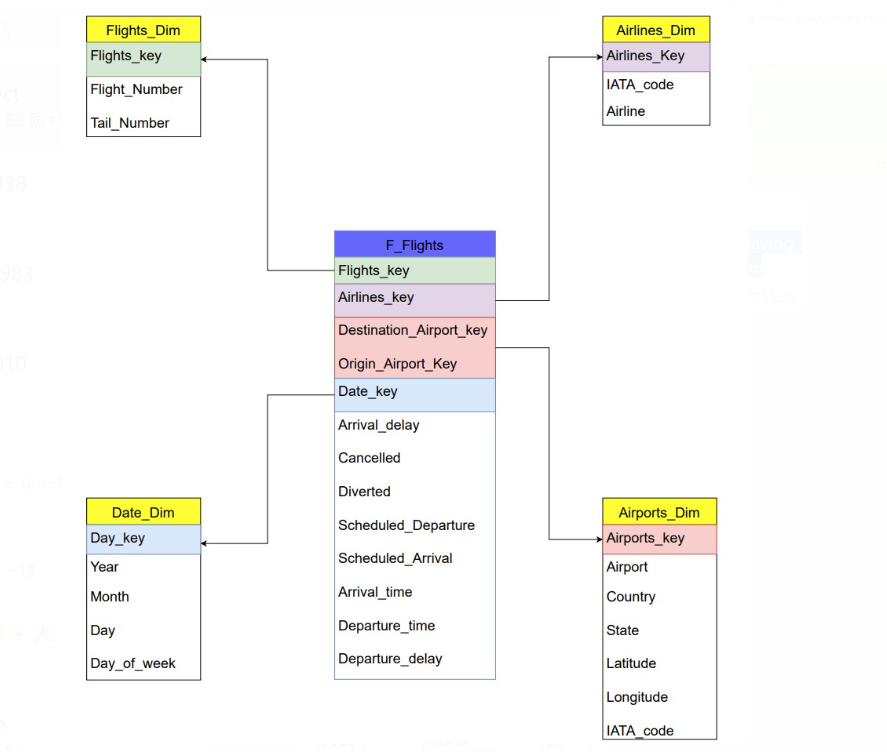

In [40]:
from IPython import display
display. Image("dim table.png")

In [41]:
%%sql
DROP TABLE IF EXISTS Date_Dim;

CREATE TABLE Date_Dim (
    Date_Key SERIAL PRIMARY KEY,
    YEAR INTEGER NOT NULL,
    MONTH INTEGER NOT NULL,
    DAY INTEGER NOT NULL,
    DAY_OF_WEEK INTEGER NOT NULL,
    DATE DATE NOT NULL 
);

 * postgresql://student@/group1
Done.
Done.


[]

Populate the Date_Dim table with data from table F_flights

In [42]:
%%sql
INSERT INTO Date_Dim(year,month,day,day_of_week,date) 
SELECT distinct year,month,day,day_of_week,
cast(year::char(4)||'-'||month::char(2)||'-'||day::char(2) as date)::date
FROM F_flights
ORDER BY date;

 * postgresql://student@/group1
365 rows affected.


[]

In [43]:
%%sql
select * from Date_Dim
limit 10

 * postgresql://student@/group1
10 rows affected.


date_key,year,month,day,day_of_week,date
1,2015,1,1,4,2015-01-01
2,2015,1,2,5,2015-01-02
3,2015,1,3,6,2015-01-03
4,2015,1,4,7,2015-01-04
5,2015,1,5,1,2015-01-05
6,2015,1,6,2,2015-01-06
7,2015,1,7,3,2015-01-07
8,2015,1,8,4,2015-01-08
9,2015,1,9,5,2015-01-09
10,2015,1,10,6,2015-01-10


Next, we add FK Date_key to the F_flights table.

In [44]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Date_Key INTEGER NULL ,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_Key)
    REFERENCES Date_Dim(Date_Key);

 * postgresql://student@/group1
Done.


[]

Populate the Date_key by linking the attributes from Date_Dim table and F_flights table

In [45]:
%%sql
UPDATE F_flights AS f
SET Date_Key = t.Date_Key
FROM Date_Dim AS t
WHERE f.year = t.year
and f.month = t.month
and f.day = t.day
and f.day_of_week=t.day_of_week;

 * postgresql://student@/group1
5819079 rows affected.


[]

We can check the F_flights table we just modified by examining the first 10 rows.

In [46]:
%%sql
select * from F_flights
limit 10

 * postgresql://student@/group1
10 rows affected.


year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,date_key
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,430,408,-22,0,0,1
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,750,741,-9,0,0,1
2015,1,1,4,HA,102,N492HA,HNL,ITO,500,452,-8,549,543,-6,0,0,1
2015,1,1,4,OO,5467,N701BR,ONT,SFO,500,513,13,629,638,9,0,0,1
2015,1,1,4,HA,108,N476HA,HNL,KOA,502,501,-1,544,549,5,0,0,1
2015,1,1,4,UA,1119,N69810,GEG,DEN,545,542,-3,904,858,-6,0,0,1
2015,1,1,4,UA,1237,N65832,SEA,IAH,545,541,-4,1156,1207,11,0,0,1
2015,1,1,4,UA,1540,N78509,DCA,IAH,545,550,5,814,807,-7,0,0,1
2015,1,1,4,AA,1433,N4YNAA,SAT,DFW,545,539,-6,650,638,-12,0,0,1
2015,1,1,4,UA,247,N462UA,PHX,IAH,600,751,111,928,1131,123,0,0,1


The Date_key attribute has been successfully added to the F_flights table from the output.

### Create the Airports_Dim table as a dimension table

In [47]:
%%sql
CREATE TABLE Airports_Dim (
 Airports_Key SERIAL PRIMARY KEY,
 IATA_CODE CHAR(3) ,
 AIRPORT varchar(100) ,
 CITY CHAR(30) ,
 STATE CHAR(3) ,
 COUNTRY CHAR(3) ,
 LATITUDE FLOAT ,
 LONGITUDE FLOAT
);

 * postgresql://student@/group1
Done.


[]

Populate the Airports_Dim table with data from the F_flights table

In [48]:
%%sql
INSERT INTO Airports_Dim (IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE)
SELECT DISTINCT IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
FROM Airports;

 * postgresql://student@/group1
322 rows affected.


[]

Check the Airports_Dim table we just created by examining the first 10 rows

In [49]:
%%sql
SELECT * FROM Airports_Dim
Limit 10

 * postgresql://student@/group1
10 rows affected.


airports_key,iata_code,airport,city,state,country,latitude,longitude
1,ORH,Worcester Regional Airport,Worcester,MA,USA,42.26734,-71.87571
2,SAN,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3,RST,Rochester International Airport,Rochester,MN,USA,43.90883,-92.49799
4,BUR,Bob Hope Airport (Hollywood Burbank Airport),Burbank,CA,USA,34.20062,-118.3585
5,FAY,Fayetteville Regional Airport,Fayetteville,NC,USA,34.99147,-78.88
6,AGS,Augusta Regional Airport (Bush Field),Augusta,GA,USA,33.36996,-81.9645
7,ICT,Wichita Dwight D. Eisenhower National Airport (Wichita Mid-Continent Airport),Wichita,KS,USA,37.64996,-97.43305
8,DRO,Durango-La Plata County Airport,Durango,CO,USA,37.15152,-107.75377
9,SUX,Sioux Gateway Airport,Sioux City,IA,USA,42.4026,-96.38437
10,RIC,Richmond International Airport,Richmond,VA,USA,37.50517,-77.31967


Next, we add FK origin_airport_key and destination_airport_key to the F_flights table.

In [50]:
%%sql
ALTER TABLE f_flights 
ADD COLUMN origin_airport_key INTEGER  NULL,
ADD COLUMN destination_airport_key INTEGER  NULL,
ADD FOREIGN KEY (origin_airport_key) REFERENCES Airports_DIM (Airports_Key) ON DELETE SET NULL,
ADD FOREIGN KEY (destination_airport_key) REFERENCES Airports_DIM (Airports_Key) ON DELETE SET NULL
;

 * postgresql://student@/group1
Done.


[]

Populate the origin_airport_key and destination_airport_key

In [51]:
%%sql
UPDATE F_flights AS f
SET origin_airport_key = t.Airports_Key
FROM Airports_Dim AS t
WHERE f.origin_airport = t.IATA_CODE;

 * postgresql://student@/group1
5332914 rows affected.


[]

In [52]:
%%sql
UPDATE F_flights AS f
SET destination_airport_key = t.Airports_Key
FROM Airports_Dim AS t
WHERE f.destination_airport = t.IATA_CODE;

 * postgresql://student@/group1
5332914 rows affected.


[]

In [53]:
%%sql
select * from F_flights 
limit 10

 * postgresql://student@/group1
10 rows affected.


year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,date_key,origin_airport_key,destination_airport_key
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,430,408,-22,0,0,1,305,132
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,750,741,-9,0,0,1,78,23
2015,1,1,4,HA,102,N492HA,HNL,ITO,500,452,-8,549,543,-6,0,0,1,174,128
2015,1,1,4,OO,5467,N701BR,ONT,SFO,500,513,13,629,638,9,0,0,1,181,302
2015,1,1,4,HA,108,N476HA,HNL,KOA,502,501,-1,544,549,5,0,0,1,174,40
2015,1,1,4,UA,1119,N69810,GEG,DEN,545,542,-3,904,858,-6,0,0,1,36,233
2015,1,1,4,UA,1237,N65832,SEA,IAH,545,541,-4,1156,1207,11,0,0,1,132,206
2015,1,1,4,UA,1540,N78509,DCA,IAH,545,550,5,814,807,-7,0,0,1,153,206
2015,1,1,4,AA,1433,N4YNAA,SAT,DFW,545,539,-6,650,638,-12,0,0,1,46,228
2015,1,1,4,UA,247,N462UA,PHX,IAH,600,751,111,928,1131,123,0,0,1,200,206


The origin_airport_key and destination_airport_keyha have been successfully added to the Exempt_Organization table from the output.

### Create the Airlines_Dim table as a dimension table

In [54]:
%%sql
DROP TABLE IF EXISTS Airlines_Dim;
CREATE TABLE Airlines_Dim (
 Airlines_Key SERIAL PRIMARY KEY,
 IATA_CODE CHAR(3) ,
 AIRLINE varchar(100) 
);

 * postgresql://student@/group1
Done.
Done.


[]

Populate the Airlines_Dim with data from table F_Flights

In [55]:
%%sql
INSERT INTO Airlines_Dim (IATA_CODE,AIRLINE)
SELECT DISTINCT 
IATA_CODE, AIRLINE
FROM Airlines;

 * postgresql://student@/group1
14 rows affected.


[]

Next, we add FK Airlines_key to the F_flights table:

In [56]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Airlines_Key INTEGER NULL,
ADD FOREIGN KEY (Airlines_Key) 
REFERENCES Airlines_Dim (Airlines_Key) ON DELETE SET NULL;

 * postgresql://student@/group1
Done.


[]

Populate the Airlines_key by linking the attributes from airlines table and F_flights table

In [57]:
%%sql
UPDATE F_flights AS f
SET Airlines_Key = t.Airlines_Key
FROM Airlines_Dim AS t
WHERE f.airline = t.IATA_CODE;

 * postgresql://student@/group1
5819079 rows affected.


[]

Check the F_flights table we just created by examining the first 10 rows

In [58]:
%%sql
select * from F_flights
limit 10;

 * postgresql://student@/group1
10 rows affected.


year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,date_key,origin_airport_key,destination_airport_key,airlines_key
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,430,408,-22,0,0,1,305,132,14
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,750,741,-9,0,0,1,78,23,13
2015,10,6,2,MQ,3241,N662MQ,13930,13367,1656,1702,6,1756,1743,-13,0,0,279,None,None,2
2015,10,6,2,OO,4671,N685BR,11823,10397,1656,1758,62,1842,1955,73,0,0,279,None,None,1
2015,10,6,2,DL,581,N3753,14869,14747,1657,1652,-5,1805,1800,-5,0,0,279,None,None,10
2015,10,6,2,DL,2567,N950DL,12278,10397,1657,1648,-9,2005,1944,-21,0,0,279,None,None,10
2015,10,6,2,DL,1690,N938DL,10529,10397,1657,1650,-7,1934,1906,-28,0,0,279,None,None,10
2015,10,6,2,EV,4175,N11194,10431,11618,1657,1648,-9,1850,1824,-26,0,0,279,None,None,11
2015,10,6,2,DL,1532,N904DL,11423,10397,1657,1654,-3,2005,1948,-17,0,0,279,None,None,10
2015,10,6,2,UA,1749,N78509,14771,13830,1657,1651,-6,1924,1927,3,0,0,279,None,None,9


The Airlines_KEY attribute has been successfully added to the F_flights table from the output.

### Create the Flights_Dim table as a dimension table

In [59]:
%%sql
DROP TABLE IF EXISTS Flights_Dim;
CREATE TABLE Flights_Dim (
 Flights_Key SERIAL PRIMARY KEY,
 flight_number INTEGER ,
 tail_number CHAR(10)
);

 * postgresql://student@/group1
Done.
Done.


[]

Populate the Flights_Dim table with data from the F_filghts table

In [60]:
%%sql
INSERT INTO Flights_Dim (flight_number,tail_number)
SELECT DISTINCT 
flight_number,tail_number
FROM F_flights;

 * postgresql://student@/group1
2098568 rows affected.


[]

Add FK Flights_KEY to the F_flights table:

In [61]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Flights_Key INTEGER NULL,
ADD FOREIGN KEY (Flights_Key) 
    REFERENCES Flights_Dim (Flights_Key) ON DELETE SET NULL;

 * postgresql://student@/group1
Done.


[]

Populate the Flights_KEY by linking the attributes from Flights table and F_flights table

In [62]:
%%sql
UPDATE F_flights AS f
SET Flights_Key = t.Flights_Key
FROM Flights_Dim AS t
WHERE f.flight_number = t.flight_number AND f.tail_number = t.tail_number;

 * postgresql://student@/group1
5804358 rows affected.


[]

The Flights_KEY attribute has been successfully added to the F_flights table from the output.

We can drop all the unnecessary columns from the rides table and only reserve the facts and surrogate keys.

In [63]:
%%sql
ALTER TABLE F_flights 
DROP COLUMN year,
DROP COLUMN month,
DROP COLUMN day,
DROP COLUMN day_of_week,
DROP COLUMN airline,
DROP COLUMN flight_number,
DROP COLUMN tail_number,
DROP COLUMN origin_airport,
DROP COLUMN destination_airport;

 * postgresql://student@/group1
Done.


[]

Check the F_flights table we just modified by examining the first 10 rows.

In [64]:
%%sql
select * from F_flights
limit 20;

 * postgresql://student@/group1
20 rows affected.


scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,date_key,origin_airport_key,destination_airport_key,airlines_key,flights_key
1659,1636,-23,1744,1725,-19,0,0,279,None,None,14,28696
1659,1704,5,2001,1951,-10,0,0,279,None,None,7,37451
5,2354,-11,430,408,-22,0,0,1,305,132,14,40890
1659,1656,-3,1957,1928,-29,0,0,279,None,None,13,107629
1659,1659,0,1941,1917,-24,0,0,279,None,None,10,268578
1700,1710,10,1805,1808,3,0,0,279,None,None,4,18266
1700,1700,0,1800,1753,-7,0,0,279,None,None,4,18484
1700,1652,-8,1945,1920,-25,0,0,279,None,None,8,40685
500,452,-8,549,543,-6,0,0,1,174,128,12,42906
502,501,-1,544,549,5,0,0,1,174,40,12,46250


Check the number of records in our fact table. If it shows 5819079 , which is the original number of records in our dataset, then we have succeeded in the wrangling steps.

In [65]:
%%sql
select count(*) from F_flights

 * postgresql://student@/group1
1 rows affected.


count
5819079


In [66]:
!wc -l flights2.csv

5819080 flights2.csv


## Ask 3: Data analysis and visualization

### Business Question 1:
In order to improve the operating efficiency at major airports, the FAA would like to develop a system of reward and punishment based on the performance of major airline carriers. What are some measurements that they could use? And based on the result from the busiest route in USA in 2015, which airline performs the best and which airline performs the worst? 

#### The average method

First, our data scientist thinks that its always good to take a look at the avearges. So we are going to find what that number is for our dataset. 

#### Avg departure delay of airlines

We start with departure delay because this type of delay would mean that the flights are using resources such as runway space, air space, operating capacity, etc. This will generate a higher operating cost for the airpots, and for FAA, running at capacity or exceeding it may raise safty concerns as well. By calculating the average, we hope we can provide some insights for regulors so that they can probably using a price ladder to encourage airline carriers to operate more efficiently. 

In [67]:
%%sql
SELECT f.airlines_key , air.iata_code,air.airline, AVG(f.departure_delay) as total_avg_delay
FROM F_flights as f
join Airlines_Dim as air
    on f.airlines_key=air.airlines_key
GROUP BY f.airlines_key, air.iata_code, air.airline
ORDER BY total_avg_delay Desc

 * postgresql://student@/group1
14 rows affected.


airlines_key,iata_code,airline,total_avg_delay
5,NK,Spirit Air Lines,15.6832738394431713
9,UA,United Air Lines Inc.,14.2622066496937309
6,F9,Frontier Airlines Inc.,13.2706085692897089
7,B6,JetBlue Airways,11.3330449956562116
4,WN,Southwest Airlines Co.,10.4501071834719520
2,MQ,American Eagle Airlines Inc.,9.6320426837546499
8,VX,Virgin America,8.9470946480784453
13,AA,American Airlines Inc.,8.7735198020893022
11,EV,Atlantic Southeast Airlines,8.4921911195729898
1,OO,Skywest Airlines Inc.,7.6782305860597294


In [68]:
%matplotlib inline

<BarContainer object of 14 artists>

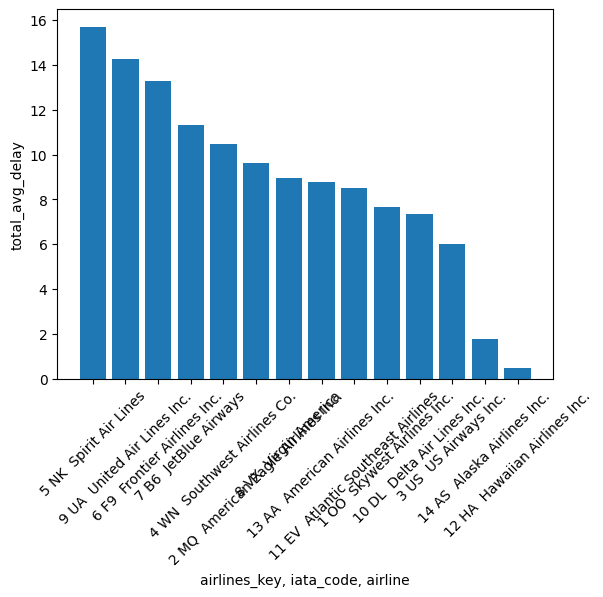

In [69]:
_.bar()

As per the above graph, Spirit Air Lines has a maximum delay of 15.68 mins. The best-performance airline is Hawaiian Airlines, with 0.48 mins of delay. We recommend our customers prefer Hawaiian AirlinesSpirit Air Lines for stressfree travel.Other airlines can use the use Alaska airlines practices to better their performance.

#### Avg arrival delay of airlines

We also want to count arrival delay as a factor, because the delay of arrival would also mean that this airline is prone to use more reasources mentioned above. 

In [70]:
%%sql
SELECT f.airlines_key , air.iata_code,air.airline, AVG(f.arrival_delay) as avg_arrival_delay
FROM F_flights as f
join Airlines_Dim as air
    on f.airlines_key=air.airlines_key
GROUP BY f.airlines_key, air.iata_code, air.airline
ORDER BY avg_arrival_delay Desc

 * postgresql://student@/group1
14 rows affected.


airlines_key,iata_code,airline,avg_arrival_delay
5,NK,Spirit Air Lines,14.2022849061586826
6,F9,Frontier Airlines Inc.,12.4020102162138359
7,B6,JetBlue Airways,6.5526796680746532
11,EV,Atlantic Southeast Airlines,6.3870610181877943
2,MQ,American Eagle Airlines Inc.,6.1106634717206549
1,OO,Skywest Airlines Inc.,5.7310050258943185
9,UA,United Air Lines Inc.,5.3477486945511447
8,VX,Virgin America,4.6875757233090480
4,WN,Southwest Airlines Co.,4.3075218626545839
3,US,US Airways Inc.,3.6224291070125557


In [71]:
%matplotlib inline

<BarContainer object of 14 artists>

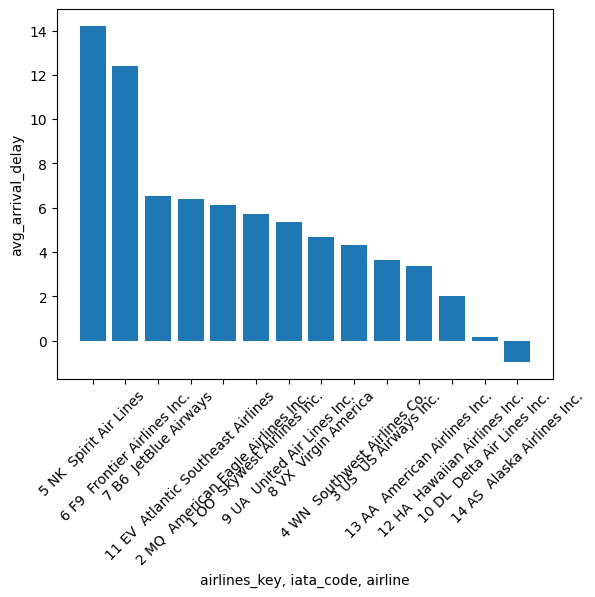

In [72]:
_.bar()

From the above graph we guys can see that even after having departure delay Alaska Airlines manages to reach on time, along with Delta airlines, these two are the best for arrival performance. spirit air lines and frontier airline has the wrost arrival delay.

#### The Percentage of delay Method

Afterwards, we are going to set up another performance measurement criteria that seems to be more . The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. As a result, we will use a 15 minutes delay as threshold to measure the percentage of flight delays that is less than or equal to 15 minutes. But Why 15 minutes? Interestingly, few airlines strive to be 100 percent on time. In fact, reaching 100 percent OTP is all but impossible, and if achieved, it would have a negative effect on profits and financial performance. External factors ranging from weather, poorly located airport gates, industrial disputes or long immigration queues all can result in delays. Airlines plan with 15-minute criteria and typically aim to achieve around 85 percent to-90 percent OTP throughout the year. Planning for a shorter time period of 10 minutes and striving to achieve a higher OTP level of 95 percent  would require additional resources and lead to higher airfares for some travelers. A requirement for additional resources in terms of aircraft, crew and supporting operations woulbdn't make sense. For the best economic value for both airlines and customers, we choose 15 minutes as a threshold as the definition of delay. 

#### Finding the busiest Air route. 

In order to put this criteria into use, we think it would make more sense to specify this performance criteria by route than calculating the universal statistics like above. As a result, we are using the busiest airline route to demostrate, it would be connecting the 2 airports, which obviously, has the most count of departure flights and arrival flights.

In [73]:
%%sql
select origin_airport_key,destination_airport_key,count(*) as total_flight 
from F_flights
group by origin_airport_key,destination_airport_key
order by total_flight desc 
limit 6


 * postgresql://student@/group1
6 rows affected.


origin_airport_key,destination_airport_key,total_flight
None,None,486165
302,78,13744
78,302,13457
65,78,12016
78,65,12015
73,78,9715


After reffering to the airport key table, we found that the busiest route is SFO to LAX. So, we are combining the flgiht route LAX to SFO along with the flight route SFO to LAX, so that it counts both incoming flights and outgoing flights of those two airports. 

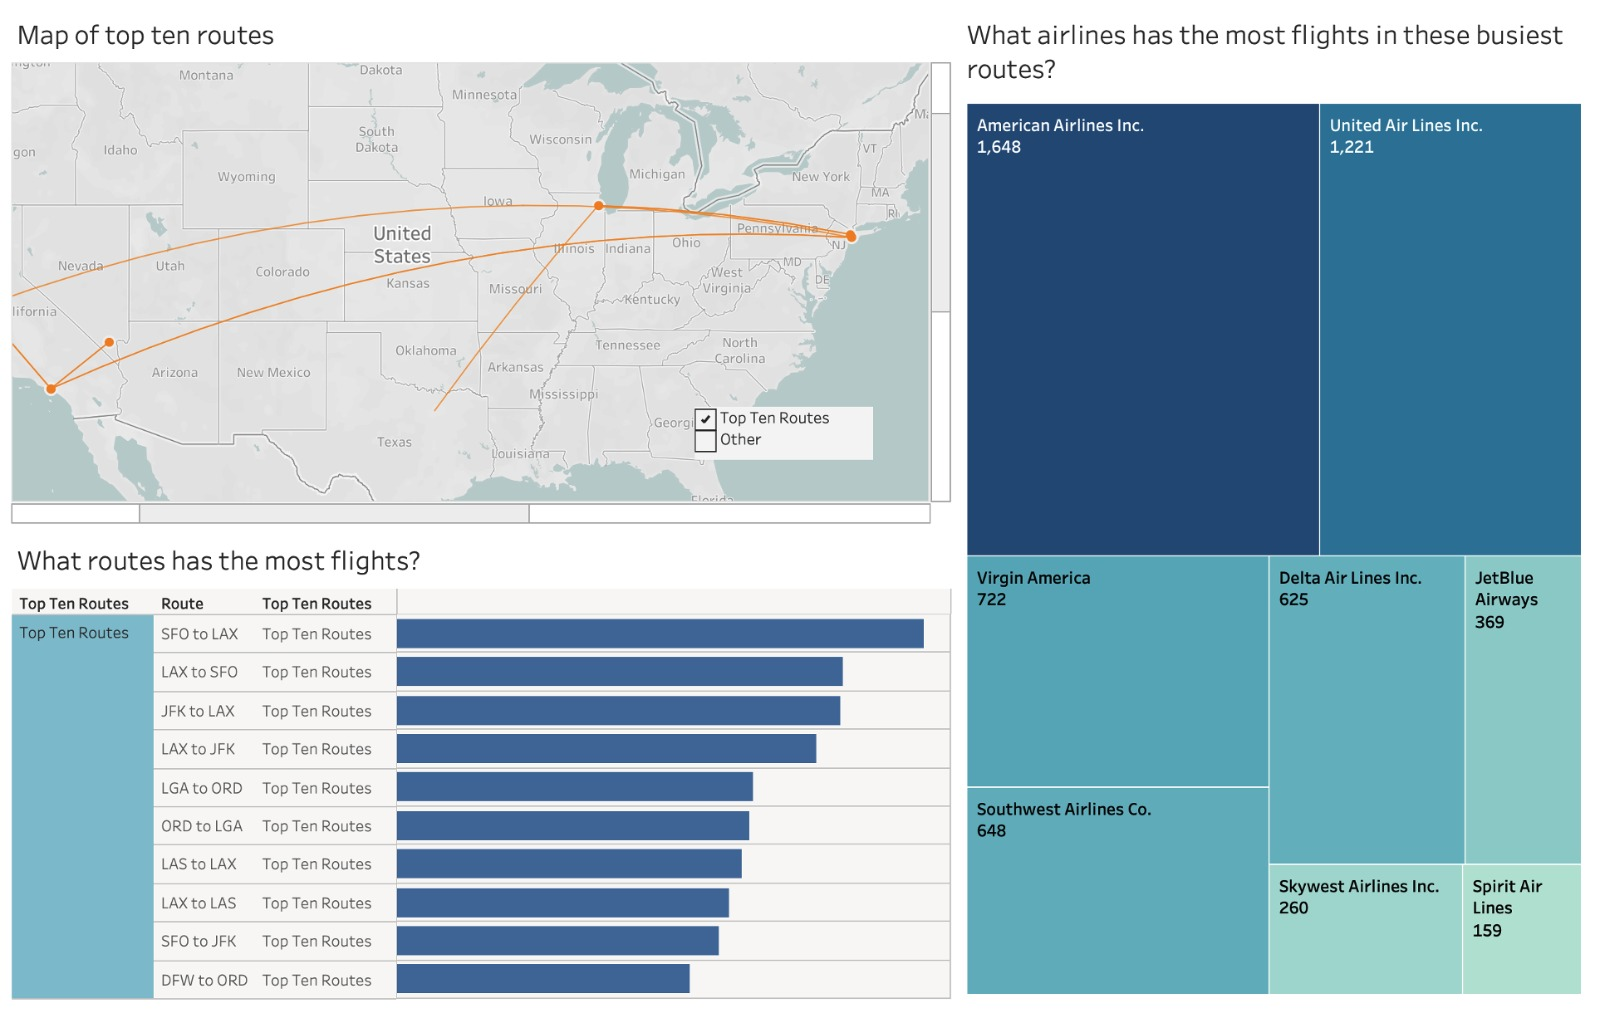

In [74]:
from IPython import display
display. Image("abba.jpg")

In [75]:
%%sql
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key
from F_flights)
select route , count(*) as total_flights
from t1 
group by route
order by total_flights desc
limit 10 

 * postgresql://student@/group1
10 rows affected.


route,total_flights
",",486165
"302,78",27201
"78,65",24031
"78,73",19309
"290,100",19214
"302,65",16877
"252,174",16595
"290,146",16449
"293,146",16404
"100,78",16197


#### Calculating the percentage of arrival delay. 

Here we put the 15 minute thershhold into use. 

In [76]:
%%sql 
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key,airlines_key, case when arrival_delay > 15 then 1 else 0 end as delay
from F_flights),
t2 as (select airlines_key,count(*) as total_flights,sum(delay) as total_delay_flights
from t1 
where route = '302,78'
group by airlines_key)
select * ,(total_delay_flights*100)/total_flights as delay_percent 
from t2 

 * postgresql://student@/group1
6 rows affected.


airlines_key,total_flights,total_delay_flights,delay_percent
1,1235,313,25
4,6143,1539,25
8,6155,1491,24
9,7043,1571,22
10,2727,1078,39
13,3898,825,21


airline key 1 = skywest airlines

airline key 4 = southwest airlines

airline key 8 = virgin america

airline key 9 = united airlines

airline key 10 = delta airlines

airline key 13 = american airlines

In [77]:
%matplotlib inline

<BarContainer object of 6 artists>

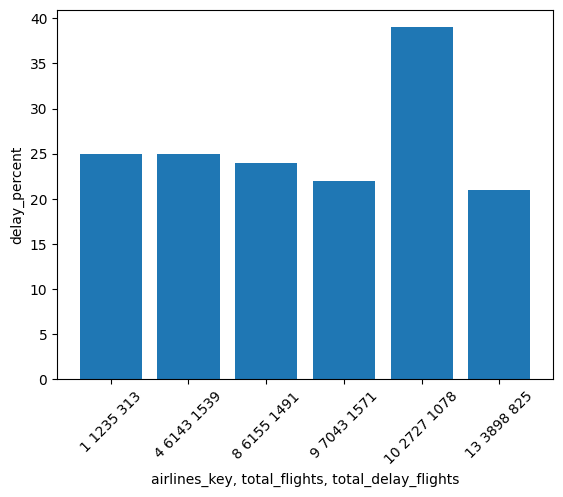

In [78]:
_.bar()

While travelling from Manchester-Boston Regional Airport to Los Angeles International Airport, the Southwest Airline with key number 4 has highest arrival delay percentage of 20 followed by Virgin America airlines of key number 8 with 17 percent, United airlines of key number 9 with 19 percent and American airlines of key number 13 with 19 percent. We can suggest customers that the virgin America airline has minimal arrival delay

airlinekey 1 represent 

In [79]:
%%sql
SELECT 
a.airline,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline )::float  AS Percentage_Rate
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
GROUP BY 1,2;

 * postgresql://student@/group1
28 rows affected.


airline,delay,cnt,total_cnt,percentage_rate
Alaska Airlines Inc.,Late,22352,172521,0.1295610389459834
Alaska Airlines Inc.,On Time,150169,172521,0.8704389610540166
American Airlines Inc.,Late,130279,725984,0.1794516132586944
American Airlines Inc.,On Time,595705,725984,0.8205483867413056
American Eagle Airlines Inc.,Late,60547,294632,0.20550042086399306
American Eagle Airlines Inc.,On Time,234085,294632,0.794499579136007
Atlantic Southeast Airlines,Late,109184,571977,0.1908887944794983
Atlantic Southeast Airlines,On Time,462793,571977,0.8091112055205018
Delta Air Lines Inc.,Late,118023,875881,0.13474775682998033
Delta Air Lines Inc.,On Time,757858,875881,0.8652522431700197


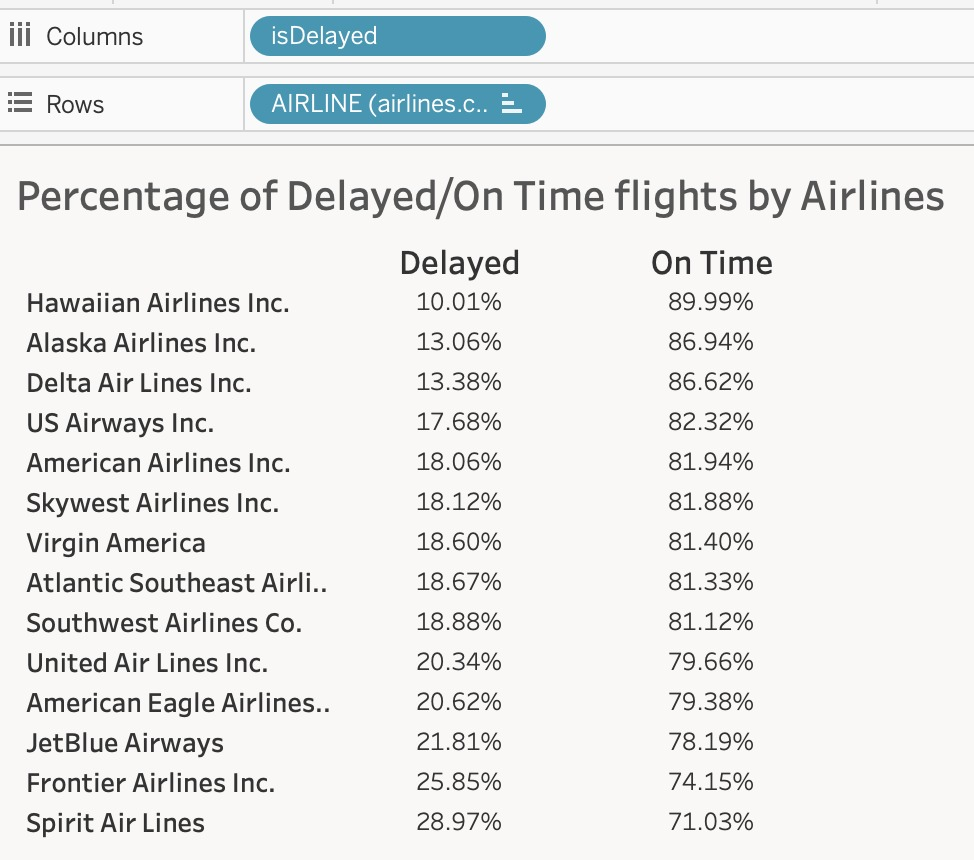

In [80]:
from IPython import display
display. Image("image5.jpeg")

#### Calculating the percentage of Departure delay

In [81]:
%%sql 
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key,airlines_key, case when departure_delay > 15 then 1 else 0 end as delay
from F_flights),
t2 as (select airlines_key,count(*) as total_flights,sum(delay) as total_delay_flights
from t1 
where route = '302,78'
group by airlines_key)
select * ,(total_delay_flights*100)/total_flights as delay_percent 
from t2 

 * postgresql://student@/group1
6 rows affected.


airlines_key,total_flights,total_delay_flights,delay_percent
1,1235,273,22
4,6143,1497,24
8,6155,1329,21
9,7043,1504,21
10,2727,913,33
13,3898,729,18


In [82]:
%matplotlib inline

<BarContainer object of 6 artists>

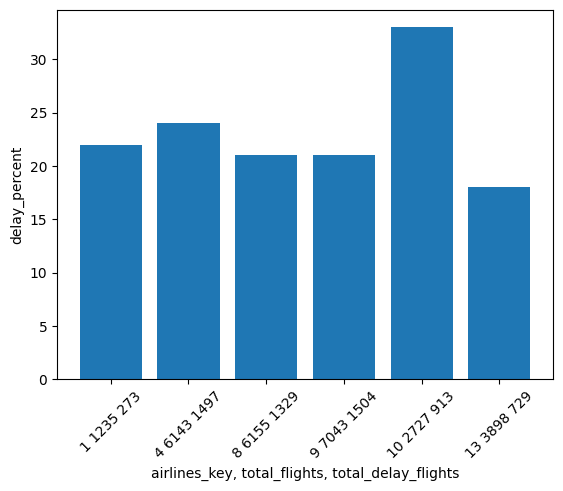

In [83]:
_.bar()

The Virgin America airlines has minimal departure delay among the other airlines- Southwest airline, United airlines and American airlines while travelling from Manchester-Boston Regional Airport to Los Angeles International Airport. Only 16 percent of the flights have departure delays. We can suggest customers that the Virgin America airlines have minimal departure delay

### Question 2 : DC airports(DCA,IAD) to NYU(JFK) 

In the second question, we are shifting our focus from regulaors to cusotmers. 

During what time period, does the air route from Washington D.C. to New York sees the most delays? What are the reason for delays? Advices that we can give to airlines to better improve their service. 

For customers: calculating arrival delay

In [84]:
%%sql
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float AS rate
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
GROUP BY 1,2,3,4
Limit 15;

 * postgresql://student@/group1
15 rows affected.


airline,year,month,delay,cnt,total_cnt,rate
Alaska Airlines Inc.,2015,1,Late,1939,13257,0.14626235196499962
Alaska Airlines Inc.,2015,1,On Time,11318,13257,0.8537376480350004
Alaska Airlines Inc.,2015,2,Late,1652,12194,0.1354764638346728
Alaska Airlines Inc.,2015,2,On Time,10542,12194,0.8645235361653272
Alaska Airlines Inc.,2015,3,Late,1970,14276,0.13799383580834967
Alaska Airlines Inc.,2015,3,On Time,12306,14276,0.8620061641916503
Alaska Airlines Inc.,2015,4,Late,1407,13974,0.10068699012451696
Alaska Airlines Inc.,2015,4,On Time,12567,13974,0.899313009875483
Alaska Airlines Inc.,2015,5,Late,1682,14682,0.11456204876719793
Alaska Airlines Inc.,2015,5,On Time,13000,14682,0.8854379512328021


DC local, calculate on time percentage base on month. 

In [85]:
%%sql
SELECT * FROM (
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float  AS rate
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
WHERE  origin_airport_key in (select airports_key from airports_dim WHERE iata_code in ('DCA','IAD'))
and destination_airport_key in (select airports_key from airports_dim WHERE iata_code in ('JFK'))
GROUP BY 1,2,3,4
) AS T 
WHERE delay='On Time';

 * postgresql://student@/group1
35 rows affected.


airline,year,month,delay,cnt,total_cnt,rate
American Airlines Inc.,2015,1,On Time,11,31,0.3548387096774194
American Airlines Inc.,2015,2,On Time,12,27,0.4444444444444444
American Airlines Inc.,2015,3,On Time,12,31,0.3870967741935484
American Airlines Inc.,2015,4,On Time,20,30,0.6666666666666666
American Airlines Inc.,2015,5,On Time,18,31,0.5806451612903226
American Airlines Inc.,2015,6,On Time,18,30,0.6
American Airlines Inc.,2015,7,On Time,18,31,0.5806451612903226
American Airlines Inc.,2015,8,On Time,23,31,0.7419354838709677
American Airlines Inc.,2015,9,On Time,25,30,0.8333333333333334
American Airlines Inc.,2015,11,On Time,25,29,0.8620689655172413


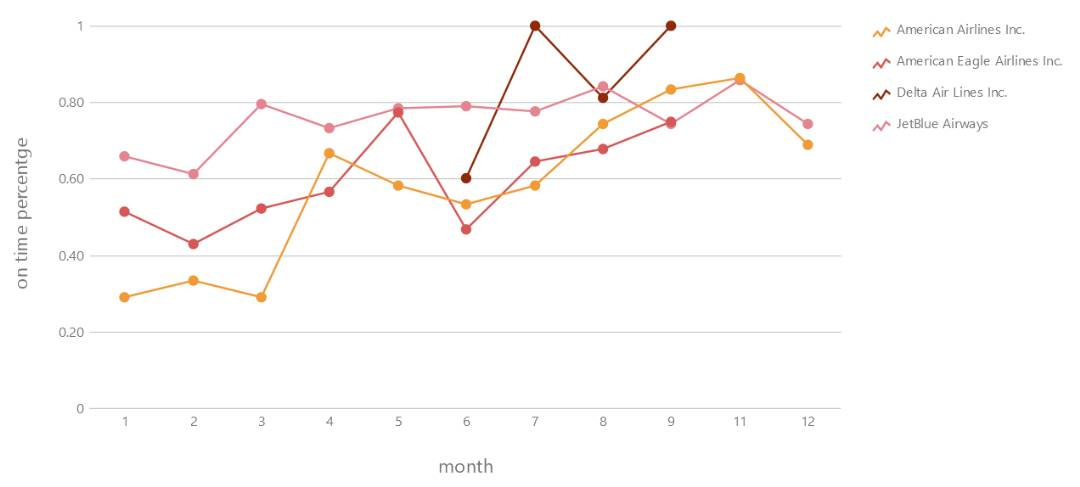

In [86]:
from IPython import display
display. Image("Image2.jpeg")

Four airways travel from IAD to NYU - American Airlines Inc, American Eagle Airlines Inc, Delta Air Lines Inc and JetBlue Airways. 

For JetBlue Airways, the On-time percentage is consistent for the months 3 to 12. 

For American Egale Airlines, the on time percentage vaires a lot, but keeps rising until winter season. 

For Delta Airlines, they only offer flights during the summer seasons, but it has the highest on time percentage during that time. 

For American airlines, it has the worst on time percentage during winter season, but it keeps getting better as the weather gets warm. 

Overall, the on-time percentage is less in the month of January and February. However, JetBlue airways outperformed it's competitors a lot. It looks like they are the best choice during the winter seasons if you don't want delays. 

Advice for airline companies: 

Because American airlines and American Eagle airlines has the worst on time perforamce during the winter, they could probably ask consulting comapnies to help them take a look into the practices that JetBlueis using. 

For Delta airlines, if they can successfully manage on-time percentage during the winter time, there might be a chance for them to further the competition by adding flights from Dec to March. espcially if they could keep up with the good job during summer time. 

In [87]:
%%sql
SELECT * FROM (
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.departure_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float  AS On_time_rate 
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
WHERE  origin_airport_key in (select airports_key from airports_dim WHERE iata_code in ('DCA','IAD'))
and destination_airport_key in (select airports_key from airports_dim WHERE iata_code in ('JFK'))
GROUP BY 1,2,3,4
) AS T 
WHERE delay='On Time';

 * postgresql://student@/group1
35 rows affected.


airline,year,month,delay,cnt,total_cnt,on_time_rate
American Airlines Inc.,2015,1,On Time,17,31,0.5483870967741935
American Airlines Inc.,2015,2,On Time,14,27,0.5185185185185185
American Airlines Inc.,2015,3,On Time,14,31,0.45161290322580644
American Airlines Inc.,2015,4,On Time,19,30,0.6333333333333333
American Airlines Inc.,2015,5,On Time,20,31,0.6451612903225806
American Airlines Inc.,2015,6,On Time,19,30,0.6333333333333333
American Airlines Inc.,2015,7,On Time,18,31,0.5806451612903226
American Airlines Inc.,2015,8,On Time,21,31,0.6774193548387096
American Airlines Inc.,2015,9,On Time,21,30,0.7
American Airlines Inc.,2015,11,On Time,25,29,0.8620689655172413


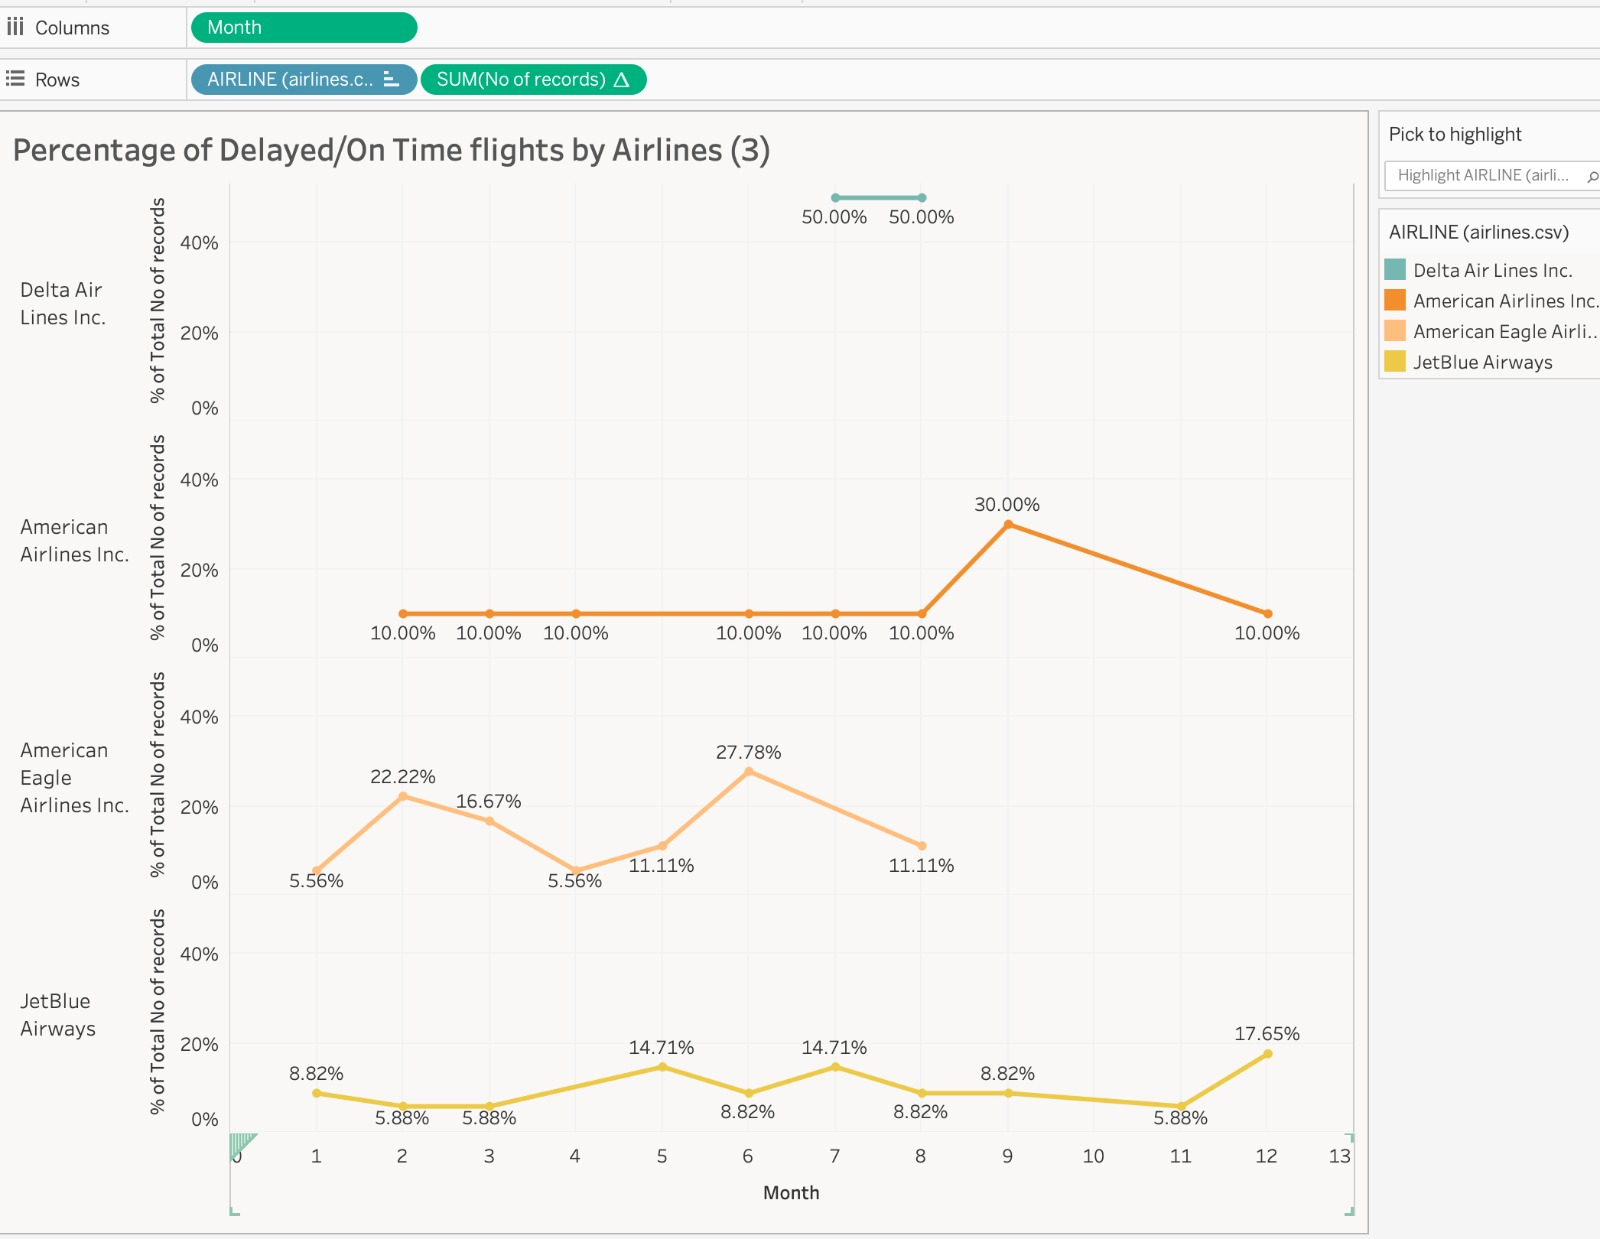

In [88]:
from IPython import display
display. Image("image11.jpeg")

Here, we used Tableau to create a graph that compares the performance of each airlines.

### Question 3

Is there a relationship between customer's attitude on social media with performance of airlines
? Should people rely on social media platforms to choose airlines or should the airline companies use social media to monitor their brands? 

We found an extra dataset, twitter_2015.csv that represents customers' interactions with airline comapnies that alreday has  twitter account. 

Situation Analysis:

Social media platforms, in nature, in an excellent place where companies can collect important business information such as customer attitude, product experience, as well as managing and processing customer questions. The twitter platform, stands out among all the other platforms as it provides a more focused, simple environment for both users and companies to interact with each other. As we can see in the graph, from 2013 to 2015, more and more customers choose to express their attitude on the twitter platform than the others.

To testify that, we are trying to see if twitter is a good source of information for airline companies to help explain insights  provided by our previous analysis, such as whether the performance of airlines would have a positive effect on brand attitude. Thus, an airline should invest resources in managing and creating social media presence. We can also use this information to see whether or not consumers can rely on informations on social media to determine what airline they should trust for a better experience. 

As a result, we are choosing Twitter data from 6 major airlines that has a twitter account in 2015. We also have data for all 6 of the airlines in our previous dataset. So let’s start comparing.

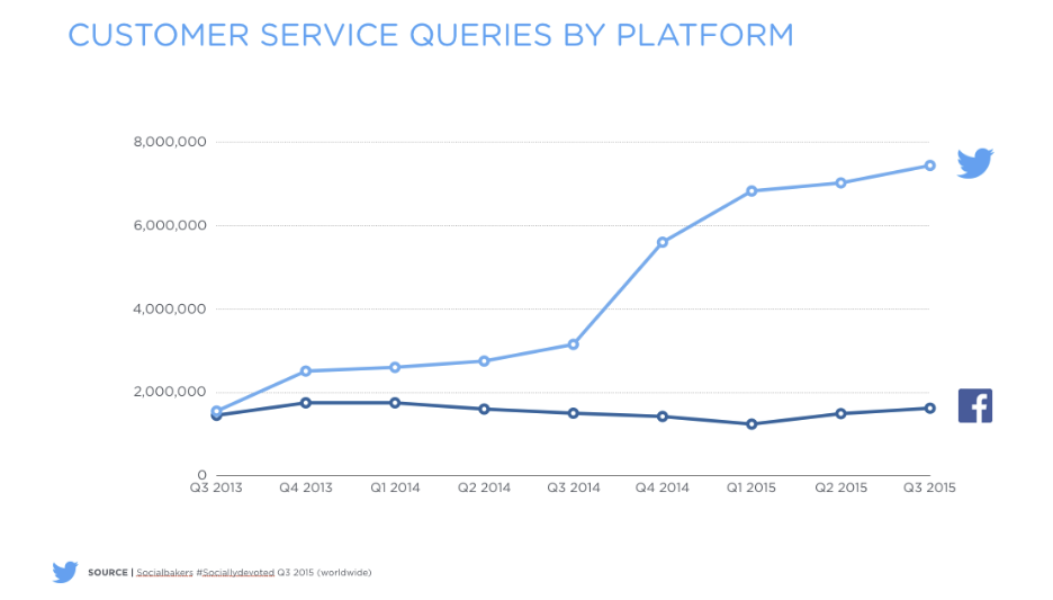

In [89]:
from IPython import display
display. Image("image202.png")

In [101]:
!xsv headers Tweets.csv

1   tweet_id
2   airline_sentiment
3   airline_sentiment_confidence
4   negativereason
5   negativereason_confidence
6   airline
7   airline_sentiment_gold
8   name
9   negativereason_gold
10  retweet_count
11  text
12  tweet_coord
13  tweet_created
14  tweet_location
15  user_timezone


In [112]:
!csvcut -c 2,6 Tweets.csv > Tweets2.csv

In [113]:
!xsv headers Tweets2.csv

1   airline_sentiment
2   airline


First, we create a new table that combines twitter sentiment data with the names of airline

In [114]:
%%sql
DROP TABLE IF EXISTS T_tweets;
CREATE TABLE T_tweets (
 Airline_sentiment varchar(100),
 airline char(100)
);

 * postgresql://student@/group1
Done.
Done.


[]

In [115]:
%%sql
select *
from T_tweets
limit 10 

 * postgresql://student@/group1
0 rows affected.


airline_sentiment,airline


In [116]:
%%sql
COPY T_tweets FROM '/home/ubuntu/notebooks/Tweets2.csv'
CSV
HEADER;

 * postgresql://student@/group1
14640 rows affected.


[]

We are changing the airline names on the twitter data, so that the names match our data in the airline dimension atable

In [117]:
%%sql
update T_tweets set airline = (
case  when airline='Southwest' then 'WN'
      when airline='Virgin America' then 'VX'
   when airline='Delta' then 'DL'
   when airline='American' then 'AA'
   when airline='US Airways' then 'US'
   when airline='United' then 'UA'  end  
);

 * postgresql://student@/group1
14640 rows affected.


[]

Here we count the oveall number of customers' attitutes in the format of percentage of total interactions. 

In [118]:
%%sql
SELECT 
airline ,
ROUND(SUM(CASE WHEN airline_sentiment='neutral' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  neutral,
ROUND(SUM(CASE WHEN airline_sentiment='positive' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  positive,
ROUND(SUM(CASE WHEN airline_sentiment='negative' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  negative
FROM T_tweets
GROUP BY airline ;

 * postgresql://student@/group1
6 rows affected.


airline,neutral,positive,negative
AA,0.17,0.12,0.71
VX,0.34,0.30,0.36
UA,0.18,0.13,0.69
US,0.13,0.09,0.78
WN,0.27,0.24,0.49
DL,0.33,0.24,0.43


add the columns into airline dimension table

In [119]:
%%sql
ALTER TABLE airlines_dim 
  ADD COLUMN neutral float,
  ADD COLUMN positive float,
  ADD COLUMN negative float;

 * postgresql://student@/group1
(psycopg2.errors.DuplicateColumn) column "neutral" of relation "airlines_dim" already exists

[SQL: ALTER TABLE airlines_dim 
  ADD COLUMN neutral float,
  ADD COLUMN positive float,
  ADD COLUMN negative float;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [120]:
%%sql
UPDATE airlines_dim AS f
SET neutral = t.neutral,positive = t.positive,negative = t.negative
FROM (
 SELECT 
 airline ,
 ROUND(SUM(CASE WHEN airline_sentiment='neutral' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  neutral,
 ROUND(SUM(CASE WHEN airline_sentiment='positive' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  positive,
 ROUND(SUM(CASE WHEN airline_sentiment='negative' THEN 1 ELSE 0.0 END)/COUNT(*),2)  AS  negative
 FROM T_tweets
 GROUP BY airline
) AS t
WHERE f.iata_code = t.airline;

 * postgresql://student@/group1
6 rows affected.


[]

In [121]:
%%sql
select  * from  airlines_dim  where  neutral is not null;

 * postgresql://student@/group1
6 rows affected.


airlines_key,iata_code,airline,neutral,positive,negative
3,US,US Airways Inc.,0.13,0.09,0.78
4,WN,Southwest Airlines Co.,0.27,0.24,0.49
8,VX,Virgin America,0.34,0.3,0.36
9,UA,United Air Lines Inc.,0.18,0.13,0.69
10,DL,Delta Air Lines Inc.,0.33,0.24,0.43
13,AA,American Airlines Inc.,0.17,0.12,0.71


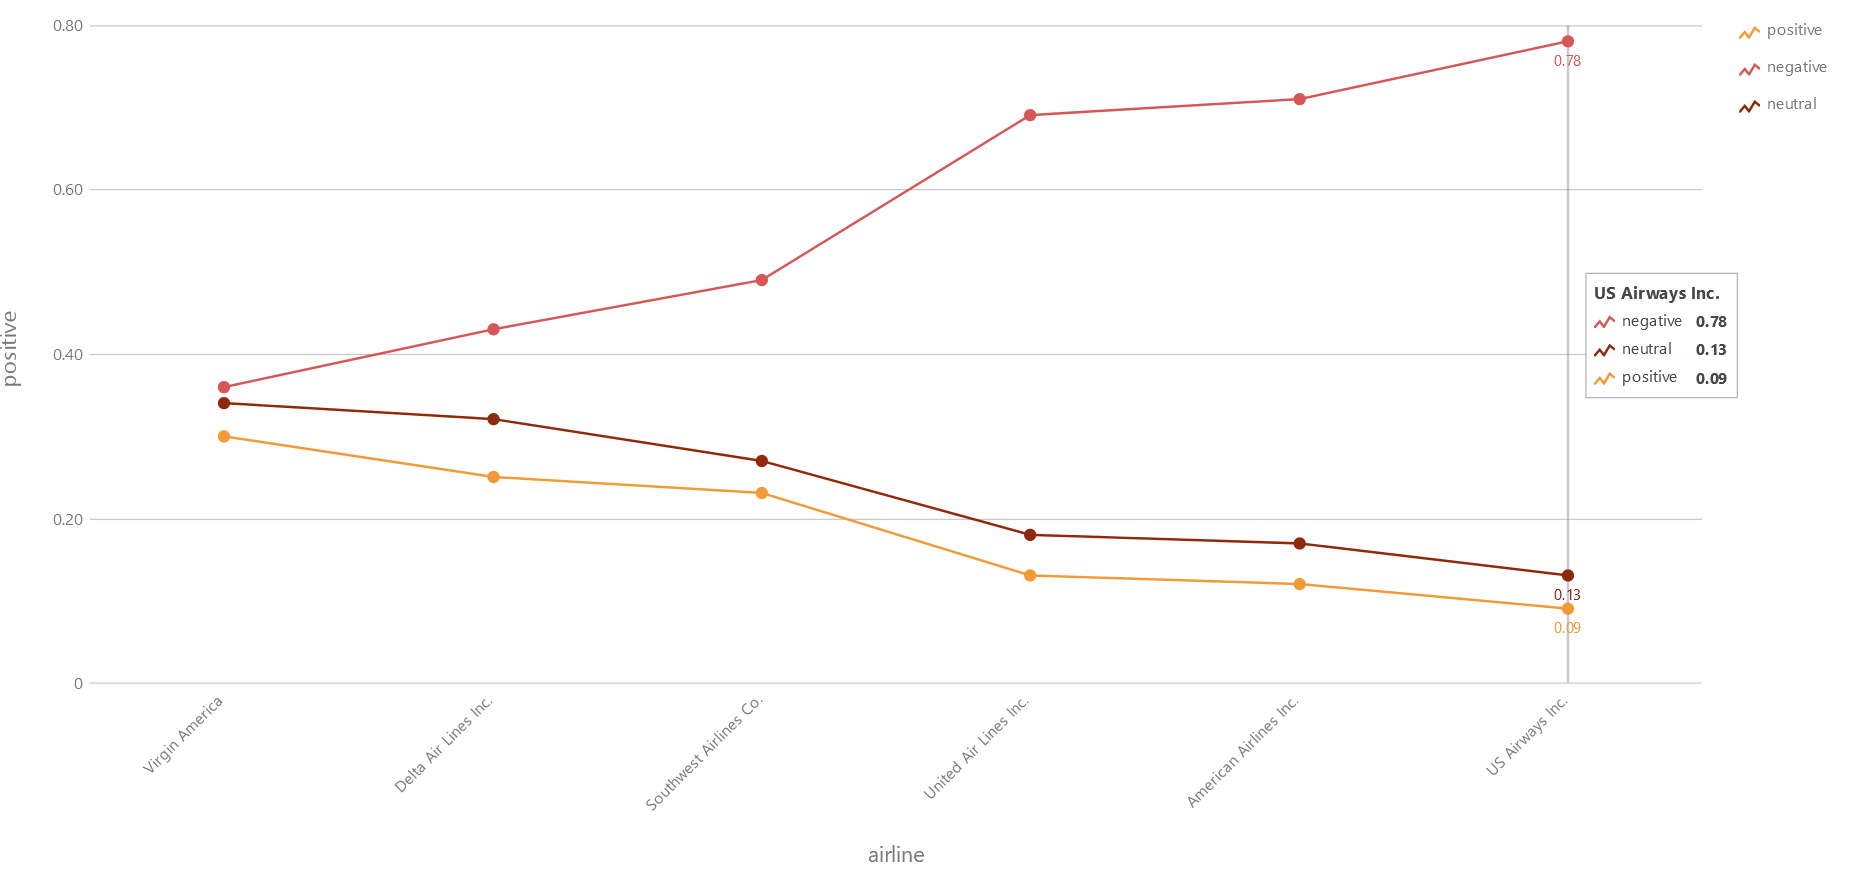

In [122]:
from IPython import display
display. Image("image302.png")

The 6 Airlines are all received mostly negative feedback.

In [127]:
%%sql
SELECT
a.airline,
CASE
WHEN (f.arrival_delay) < 15 THEN 'On Time'
ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline )::float AS Rate
FROM F_flights f
INNER JOIN date_dim d ON f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
WHERE f.airlines_key in (select airlines_key from airlines_dim where neutral is not null)
GROUP BY 1,2;

 * postgresql://student@/group1
12 rows affected.


airline,delay,cnt,total_cnt,rate
American Airlines Inc.,Late,130279,725984,0.1794516132586944
American Airlines Inc.,On Time,595705,725984,0.8205483867413056
Delta Air Lines Inc.,Late,118023,875881,0.13474775682998033
Delta Air Lines Inc.,On Time,757858,875881,0.8652522431700197
Southwest Airlines Co.,Late,236626,1261855,0.18752233814503252
Southwest Airlines Co.,On Time,1025229,1261855,0.8124776618549675
US Airways Inc.,Late,36549,198715,0.18392672923533704
US Airways Inc.,On Time,162166,198715,0.816073270764663
United Air Lines Inc.,Late,104722,515723,0.20305861867708053
United Air Lines Inc.,On Time,411001,515723,0.7969413813229195


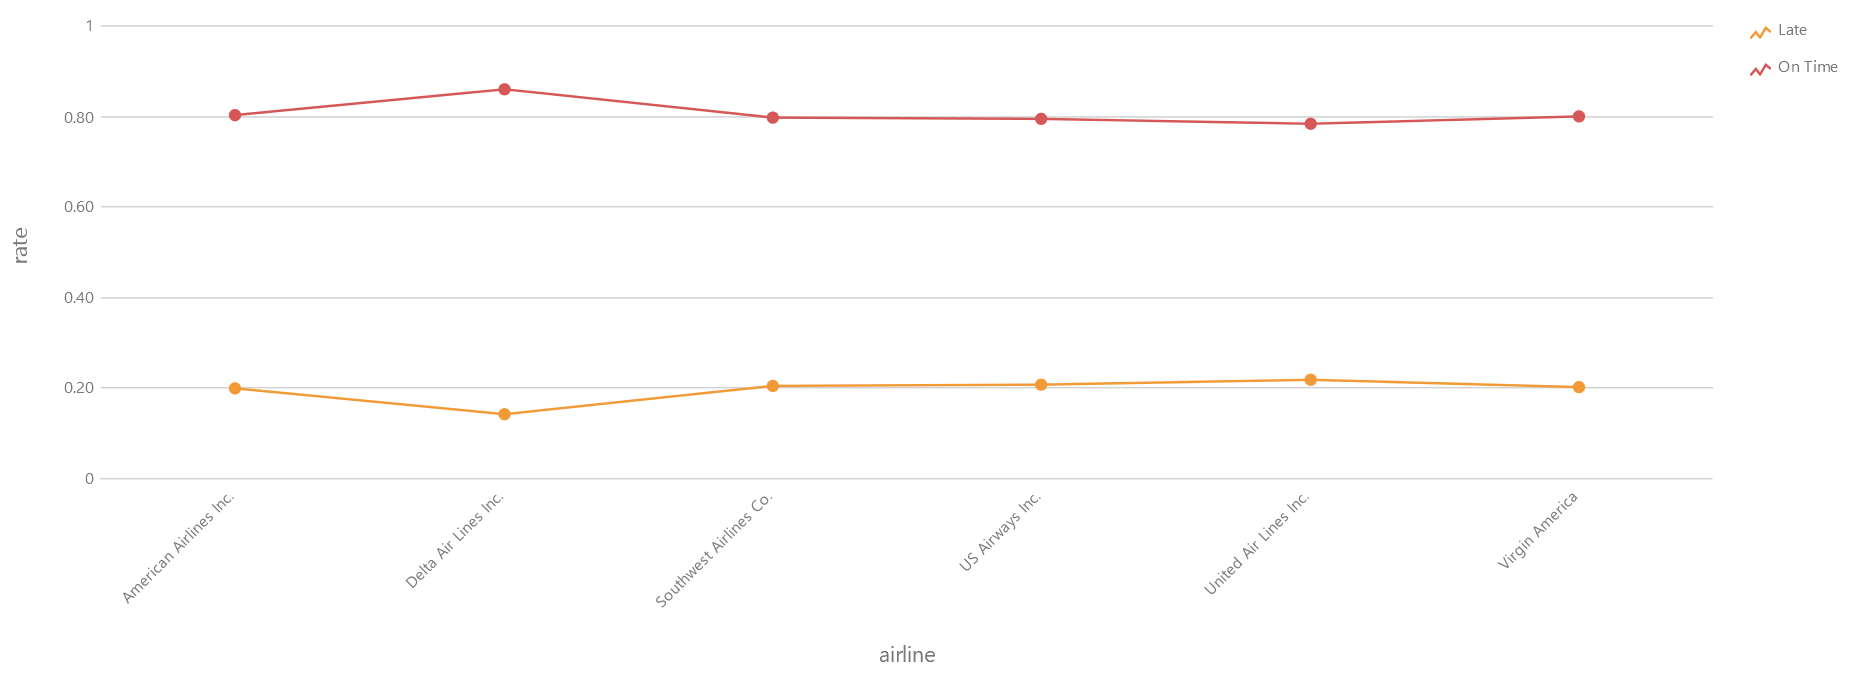

In [128]:
from IPython import display
display. Image("image303.png")

There are not directly relationship between on time percentage rate and sentiment on Twitter.

Result showcase: 

For passengers flight delays is a problem that cause inconveniences. This not only irritate passengers and disrupt their schedules but also cause a decrease in efficiency and brand damage for the airline. We are expecting that there will be a positive relationship between the sentiment of airline and delay time. (Higher delay will have a higher negative sentiment rate)


About the data

Virgin America and delta airlines have the highest positive review on twitter, but we do not observe any relationship between delay time and reviews on twitter.Below are the reasons why this approach of analysis does not work out

Most airline companies from the data set have a lot of negative reviews on twitter.
The reason for this can be that anyone can share their incomplete opinions freely.
That also includes the potential widespread of false information. And when false news is spread, it creates a lot of emotional responses from people, which drives more toxicity onto the platform.


On kaggle we found an Airline Customer Satisfaction Analysis that shows all other variables that can also affect customers satisfaction. Surprisingly for customers there are a lot of things that come before punctuality.


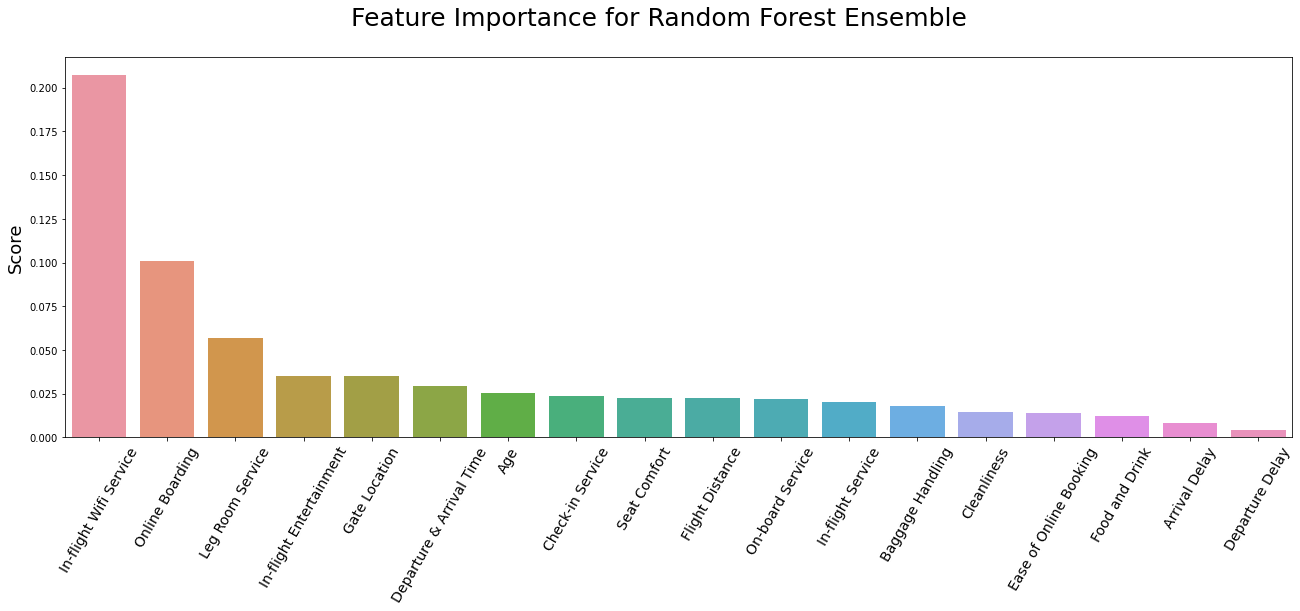

In [98]:
from IPython import display
display. Image("image301.png")